In [244]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [245]:
df = pd.read_csv("../data/clean/bank-additional-clean.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [246]:
df.shape

(38234, 21)

In [247]:
colors = {'no': 'red',
          'yes': 'lightgreen'}

In [248]:
df.insert(21,"y_count", df["y"])

# Bank client data

## How does client age affect positive campaign outcome?

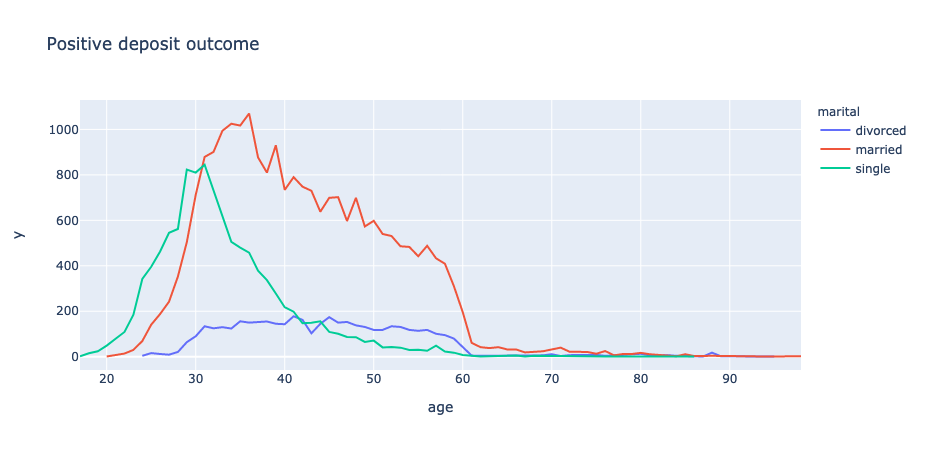

In [249]:
df_yes = df[df.y=="yes"]
df_age_yes = df.groupby(['marital', 'age']).y.count().reset_index()
fig = px.line(df_age_yes, x="age", y="y", color="marital", title="Positive deposit outcome")
fig.show()

Single people seem to deposit most in early 30s, married people most in middle 30s.

## What jobs have people willing to deposit money?

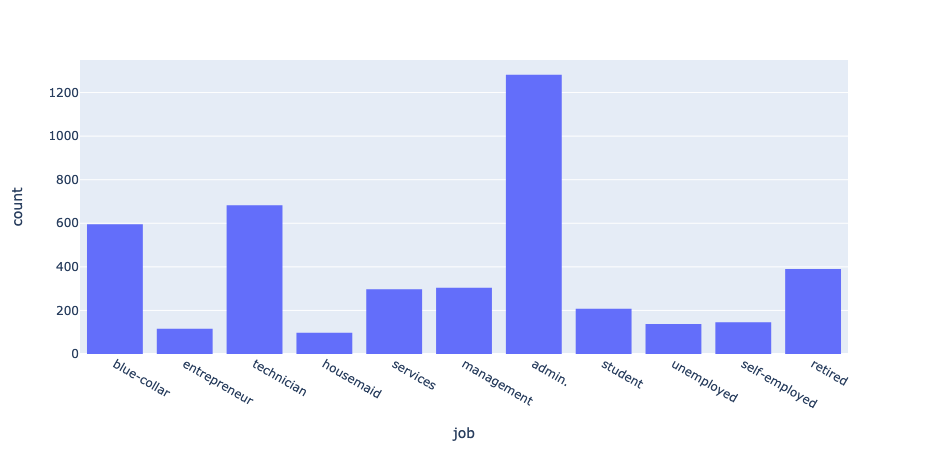

In [250]:
fig = px.histogram(df_yes, x='job')
fig.show()

## Does this mean that "admins" are more likely to deposit or are they simply being called more than others on purpose?

In [251]:
job_count = df.groupby(['job', 'y']).agg({'y_count': 'count'})

In [252]:
stats_job = job_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()

In [253]:
stats_job = stats_job.rename(columns={"y_count": "y_percentage"})

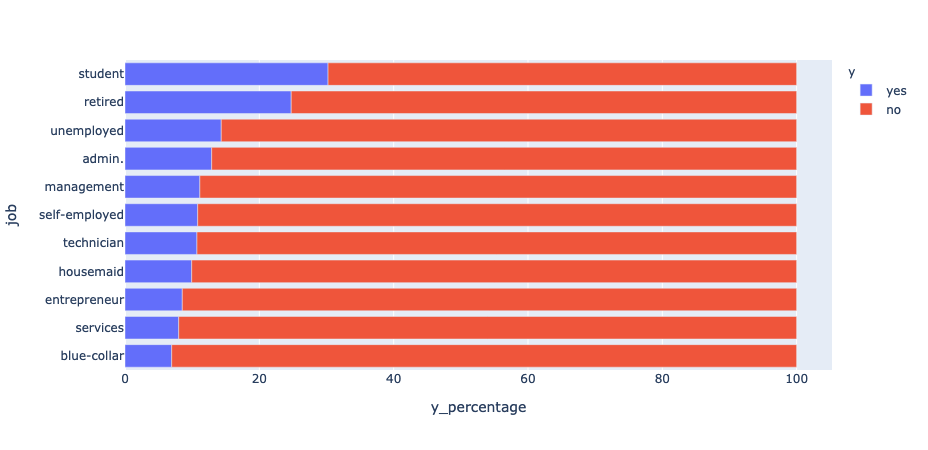

In [254]:
stats_job.sort_values(by=['y_percentage'],ascending=True, inplace=True)
fig = px.bar(stats_job, x='y_percentage', y="job", color="y", orientation='h', )
fig.show()

Percentage results look very interesting. Admins do deposit most among employed people, but students, retired and unemployed deposit more than them. It seems like students and retired are the best targets for the marketing campaign.
This could be explained with the fact that employed people probably already have a deposit account.

## Deposit outcome considering marital status in percentage

How many people said yes and how many said no to deposit considering marital status:

In [255]:
marital_count = df.groupby(['marital', 'y']).agg({'y_count': 'count'})

In percentage:

In [256]:
stats_marital = marital_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()

In [257]:
stats_marital = stats_marital.rename(columns={"y_count": "y_percentage"})

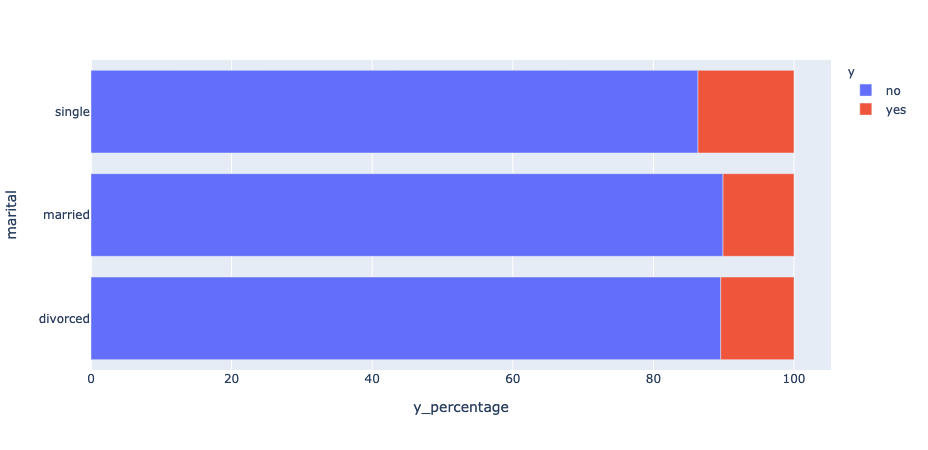

In [258]:
fig = px.bar(stats_marital, x='y_percentage', y="marital", color="y", orientation='h')
fig.show()

As expected, single people are more willing to open up a deposit account.

## Are people with loans and houses a good marketing target?

In [259]:
df.loan.value_counts()

no     32275
yes     5959
Name: loan, dtype: int64

In [260]:
df_loan = df.groupby(['loan', 'y'])['y_count'].count()
stats_loan = df_loan.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
stats_loan = stats_loan.rename(columns={"y_count": "%"})
stats_loan

,loan,y,%
0,no,no,88.790085
1,no,yes,11.209915
2,yes,no,89.276724
3,yes,yes,10.723276


Having a loan doesnt affect the outcome of the marketing campaign at all. Lets see if housing does:

In [261]:
df_housing = df.groupby(['housing', 'y'])['y_count'].count()
stats_housing = df_housing.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
stats_housing = stats_housing.rename(columns={"y_count": "%"})
stats_housing

,housing,y,%
0,no,no,89.207859
1,no,yes,10.792141
2,yes,no,88.572401
3,yes,yes,11.427599


As expected, housing also doesnt have much influence on outcome of the marketing campaign.

# Data related with the last contact of the current campaign

## Does the day of week affect deposit outcome?

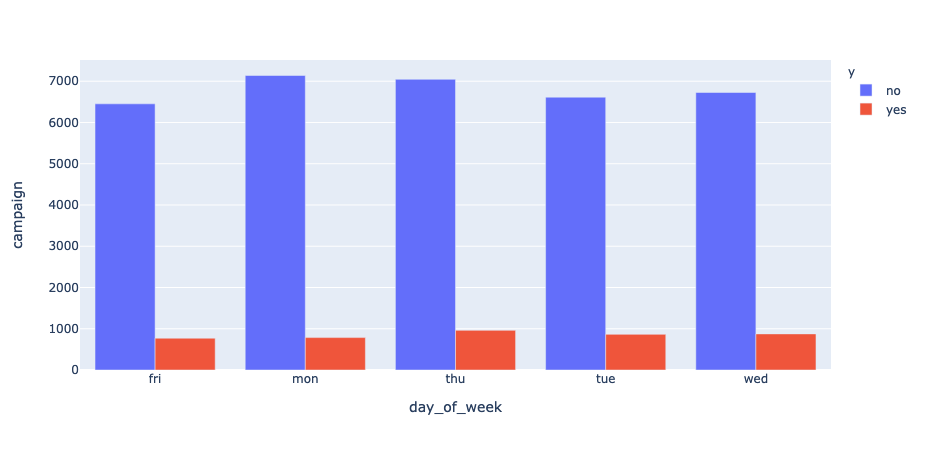

In [262]:
df_y = df.groupby(["day_of_week", "y"]).campaign.count().reset_index()
#df_y['day_of_week']= ["mon", "tue", "wed", "thu", "fri"]
fig = px.bar(df_y, x='day_of_week', y="campaign", color="y", barmode="group")
fig.show()

Day of week doesnt seem to have significant impact.

## Which type of contacting clients proves to be most efficient?

In [263]:
df.contact.value_counts()

cellular     24432
telephone    13802
Name: contact, dtype: int64

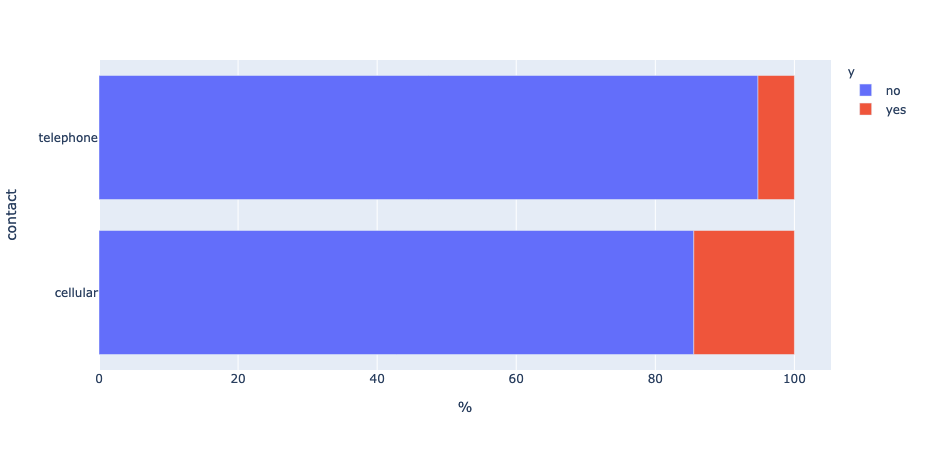

In [264]:
df_contact = df.groupby(["contact", "y"])["y_count"].count()
stats_contact = df_contact.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
stats_contact = stats_contact.rename(columns={"y_count": "%"})
fig = px.bar(stats_contact, x='%', y="contact", color="y", orientation='h')
fig.show()

Contacting potential customer via cellular seems like more practiced and more efficient method than telephone calls.

# Other attributes

## Does the increase in number of contacts per campaign affect the outcome?

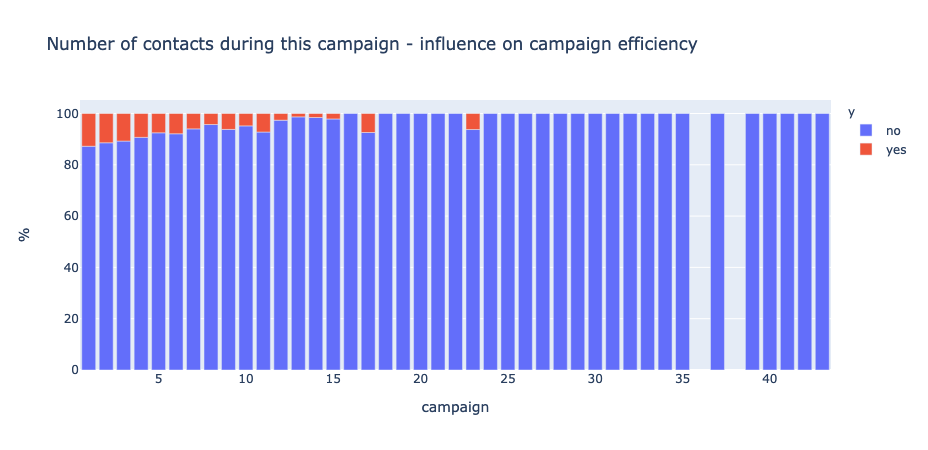

In [265]:
df_campaign = df.groupby(['campaign', 'y'])["y_count"].count()
stats_campaign = df_campaign.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
stats_campaign = stats_campaign.rename(columns={"y_count": "%"})
fig = px.bar(stats_campaign, x="campaign", y="%", color="y", title="Number of contacts during this campaign - influence on campaign efficiency")
fig.show()

After 20 calls we should definitely stop contacting clients.

Does outcome of the previous campaign in any way influence outcome of the current campaign?

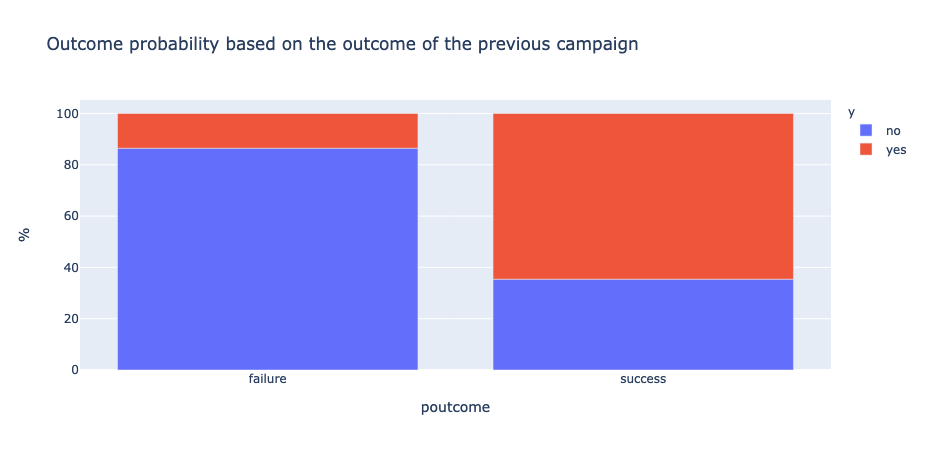

In [266]:
df_poutcome = df.groupby(['poutcome', 'y'])["y_count"].count()
stats_poutcome = df_poutcome.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
stats_poutcome = stats_poutcome[stats_poutcome.poutcome != "nonexistent"]
stats_poutcome = stats_poutcome.rename(columns={"y_count": "%"})
fig = px.bar(stats_poutcome, x='poutcome', y='%', color='y', orientation='v', title='Outcome probability based on the outcome of the previous campaign')
fig.show()